In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import astropy.time
import dateutil.parser

Note: When collecting data for the various exercises, there some conflicting instances for some fields. Thus, some values may be little more than rough estimates; however, I'm confident the underlying operations are correct.

## Exercise 1

In [194]:
# File path to planet data
filepath = 'p_elem_t1.txt'

In [209]:
from numpy import sin, cos

# Minimize anomaly (Does weird things if actually used)
def iterate(e, M):
    estar = e * 57.29578
    tol = 10**-6
    
    E = M + estar * sin(M)
    ΔE = 1
    while np.absolute(ΔE) > tol:
        ΔM = M - (E - estar * sin(E))
        ΔE = ΔM / (1 - e * cos(E))
        E += ΔE
    
    return E

In [196]:
# Read in planet data
file = open(filepath, 'r')
lines = file.readlines()
data = {}
start, secondline = False, False
for l in lines:    
    if secondline:
        splitline = [x for x in l[:-2].split('  ') if x != '']
        a, e, I, L, ω, Ω = [float(n) for n in splitline]
        data[target].update({'rate':{'a':a, 'e':e, 'I':I, 'L':L, 'ω':ω, 'Ω':Ω}})
        secondline = False
        continue 
    if start:
        splitline = [x for x in l[:-2].split('  ') if x != '']
        target = splitline[0]
        a, e, I, L, ω, Ω = [float(n) for n in splitline[1:]]
        data.update({target:{'a':a, 'e':e, 'I':I, 'L':L, 'ω':ω, 'Ω':Ω}})
        secondline = True
    if l.startswith('---'): start = True

In [197]:
# Calculate T for January 28, 2018
Te = astropy.time.Time('2018-01-28 15:00').jd
T = (Te - 2451545) / 36525

In [198]:
# Use the given formulas to calculate the orbital elements
for planet in ['Mercury', 'Venus', 'EM Bary', 'Mars']:
    a = data[planet]['a'] + data[planet]['rate']['a'] * T
    e = data[planet]['e'] + data[planet]['rate']['e'] * T
    I = data[planet]['I'] + data[planet]['rate']['I'] * T
    L = data[planet]['L'] + data[planet]['rate']['L'] * T
    ω = data[planet]['ω'] + data[planet]['rate']['ω'] * T
    Ω = data[planet]['Ω'] + data[planet]['rate']['Ω'] * T
    p = ω - Ω
    M = ((L - ω) % 360) - 180
    E = M #iterate(e, M)
    data[planet].update({'p':p, 'M':M, 'E':E, 'cur':{'a':a, 'e':e, 'I':I, 'L':L, 'ω':ω, 'Ω':Ω}})

Text(0.6,-1.6,'28 Jan 2018')

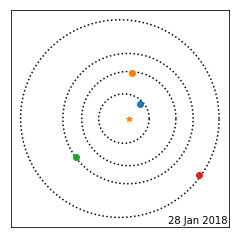

In [199]:
from numpy import sin, cos
θ = np.linspace(0, 2 * np.pi, 100)
fig, ax = plt.subplots()

# Use the new elements to figure out where the planets are in their orbits
for planet in ['Mercury', 'Venus', 'EM Bary', 'Mars']:
    a = data[planet]['a']
    e = data[planet]['e']
    E = data[planet]['E']
    I = data[planet]['I']
    ω = data[planet]['ω']
    Ω = data[planet]['Ω']
    
    # Orbital for this planet
    r = (a * (1 - e**2)) / (1 + e * cos(θ))
    xOrbit = r * cos(θ)
    yOrbit = r * sin(θ)
    
    # Planet position in x, y coordinates
    xPrime = a * (cos(E) - e)
    yPrime = a * np.sqrt(1 - e**2) * sin(E)
    xPlanet = (cos(ω) * cos(Ω) - sin(ω) * sin(Ω) * cos(I)) * xPrime
    xPlanet += (-sin(ω) * cos(Ω) - cos(ω) * sin(Ω) * cos(I)) * yPrime
    yPlanet = (cos(ω) * sin(Ω) + sin(ω) * cos(Ω) * cos(I)) * xPrime
    yPlanet += (-sin(ω) * sin(Ω) + cos(ω) * cos(Ω) * cos(I)) * yPrime
    
    # Plot orbit, then planet
    ax.plot(xOrbit, yOrbit, 'k:')
    ax.plot(yPlanet, xPlanet, 'o')
    
ax.set_aspect('equal')
ax.plot(0, 0, '*', color = 'C1')
ax.set_aspect('equal')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.text(0.6,-1.6,'28 Jan 2018')

Despite using the approximation E = M, the plot above matches the online result at January 28, 2018 with no significant discrepancies.

## Exercise 2

In [200]:
# Gravitational Constant
G = 6.67408E-11

# Escape Velocity
def escVel(M, R):
    return np.sqrt((2 * G * M) / (R * 1000))

In [201]:
# Mass, radius + exobase, exobase temperature for planets/moons
values = {}
values.update({'Mercury':{'M':3.3010E23, 'R':2.4397E3, 'T':441}})
values.update({'Venus':{'M':4.8673E24, 'R':6.0518E3, 'T':295}})
values.update({'Earth':{'M':5.9722E24, 'R':6.3710E3 + 500, 'T':1000}})
values.update({'Moon':{'M':7.3477E22, 'R':1.738E3 + 300, 'T':295}})
values.update({'Mars':{'M':6.4169E23, 'R':3.3895E3 + 400, 'T':250}})
values.update({'Jupiter':{'M':1.8981E27, 'R':6.9911E4 + 5000, 'T':1100}})
values.update({'Saturn':{'M':5.6832E26, 'R':5.8232E4 + 4000, 'T':800}})
values.update({'Titan':{'M':1.3455E23, 'R':2.575E3 + 200, 'T':149}})
values.update({'Uranus':{'M':8.6810E25, 'R':2.5362E4 + 3000, 'T':750}})
values.update({'Neptune':{'M':1.0241E26, 'R':2.4622E4 + 3000, 'T':750}})
values.update({'Pluto':{'M':1.3090E22, 'R':1.151E3, 'T':58}})

# Add escape velocity to each planet
for body in values:
    values[body].update({'EV':escVel(values[body]['M'], values[body]['R'])})
    

Text(0,0.5,'escape velocity (m/s)')

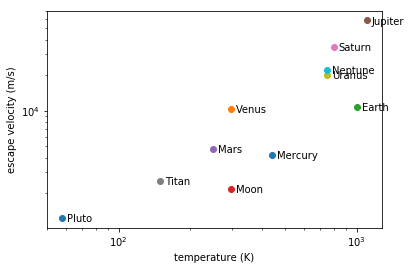

In [202]:
fig, ax = plt.subplots()

# Plot escape velocity vs temperature
for body in values:
    x, y = values[body]['T'], values[body]['EV']
    ax.plot(x, y, 'o')
    ax.annotate(body, xy = (x, y), xytext = (5, -4), textcoords = 'offset points')
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('temperature (K)')
ax.set_ylabel('escape velocity (m/s)')

In [203]:
# Boltzmann Constant
k = 1.38064852E-23

# Peak thermal velocity
def peakVel(M, T):
    return np.sqrt((k * T) / M)

Text(0,0.5,'peak thermal velocity / 6')

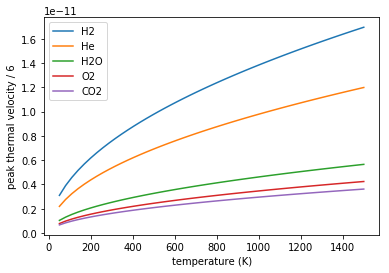

In [204]:
fig, ax = plt.subplots()

temps = np.linspace(50, 1500)
masses = {'H2':2, 'He':4, 'H2O':18, 'O2':32, 'CO2':44}

# Plot temperature vs peak thermal velocity / 6
for molecule in masses:
    ax.plot(temps, peakVel(masses[molecule], temps) / 6, label = molecule)

ax.legend()
ax.set_xlabel('temperature (K)')
ax.set_ylabel('peak thermal velocity / 6')

## Exercise 3

In [205]:
import PIL

In [206]:
# File paths for planet digital elevation maps
mercury = 'Mercury_DEM.png'
venus = 'Venus_DEM.jpg'
mars = 'Mars_DEM.jpg'

In [207]:
# Outputs a normalized histogram representing planet elevation
def elvPlot(filepath, radius, elevationMin, elevationMax):
    image = np.array(PIL.Image.open(filepath))
    image = image / np.max(image)
    image *= elevationMax - elevationMin
    image += elevationMin
    image += radius
    
    nPix, elevationBins = np.histogram(image, bins = 30)
    fig, ax = plt.subplots()
    ax.plot(elevationBins[1::] / 1.0E3, nPix / np.max(nPix), drawstyle = 'steps-mid')
    ax.set_xlabel('elevation (km)')
    ax.set_ylabel('normalized probability')

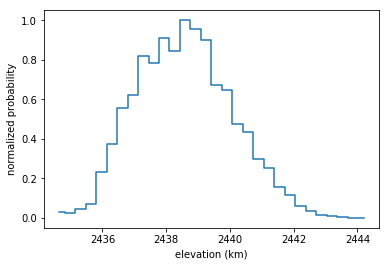

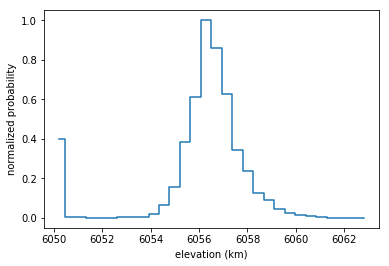

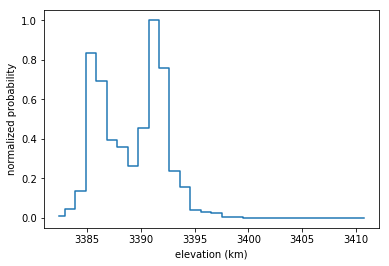

In [208]:
elvPlot(mercury, 2.4397E6, -5382.0, 4497.0)
elvPlot(venus, 6.0518E6, -2000.0, 11000.0)
elvPlot(mars, 3.3895E6, -8200.0, 21229.0)